In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
data = load_breast_cancer()
X, y = data.data, data.target

In [19]:

oob_error=[]
n_trees=list(range(10,201,10))

In [18]:

rf = RandomForestClassifier(
        n_estimators=n,        # number of trees
        oob_score=True,        # enable OOB
        random_state=42,
        n_jobs=-1
    )



In [20]:
rf.fit(X, y)
oob_error.append(1-rf.oob_score)

In [21]:
print("OOB error:",oob_error)
print("length of n_trees:",len(n_trees))

OOB error: [0]
length of n_trees: 20


In [7]:
y_pred = rf.predict(X)


In [8]:
print("Accuracy on Training Data:", accuracy_score(y, y_pred))

Accuracy on Training Data: 1.0


In [9]:
feat_importances = pd.Series(rf.feature_importances_, index=data.feature_names)
print(feat_importances.sort_values(ascending=False).head(10))

worst area              0.139357
worst concave points    0.132225
mean concave points     0.107046
worst radius            0.082848
worst perimeter         0.080850
mean perimeter          0.067990
mean concavity          0.066917
mean area               0.060462
worst concavity         0.037339
mean radius             0.034843
dtype: float64


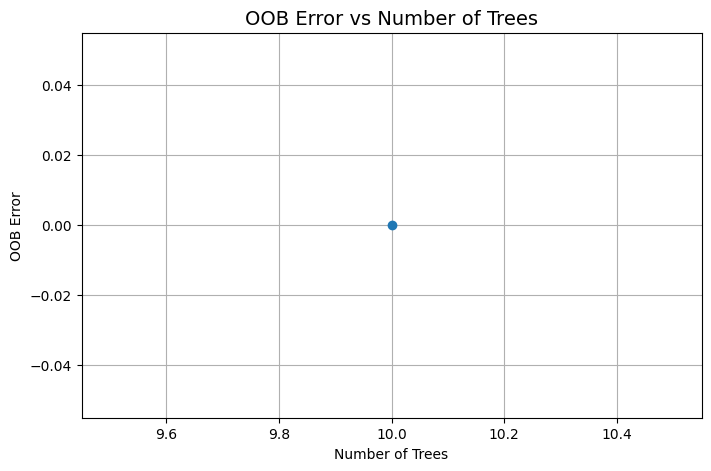

In [23]:
plt.figure(figsize=(8,5))
plt.plot(n_trees[:len(oob_error)], oob_error, marker='o', linestyle='-')
plt.title("OOB Error vs Number of Trees", fontsize=14)
plt.xlabel("Number of Trees")
plt.ylabel("OOB Error")
plt.grid(True)
plt.show()